In [120]:
import numpy as np
import pandas as pd
import json, re
from datetime import datetime


In [258]:
train_raw = pd.read_csv('data/train.tsv',delimiter='\t')

In [76]:
train_raw.belongs_to_collection

0       {'id': 556, 'name': 'Spider-Man Collection', '...
1       {'id': 256296, 'name': 'Silent Night, Deadly N...
2                                                     NaN
3       {'id': 8917, 'name': 'Hellraiser Collection', ...
4       {'id': 108693, 'name': "National Lampoon's Vac...
                              ...                        
5210    {'id': 239968, 'name': 'La cage aux folles Col...
5211    {'id': 111751, 'name': 'Texas Chainsaw Massacr...
5212                                                  NaN
5213                                                  NaN
5214    {'id': 71458, 'name': '3 Ninjas Collection', '...
Name: belongs_to_collection, Length: 5215, dtype: object

In [4]:
train_raw.columns

Index(['backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'Keywords', 'cast', 'crew'],
      dtype='object')

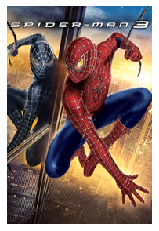

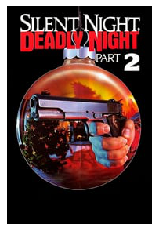

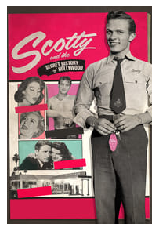

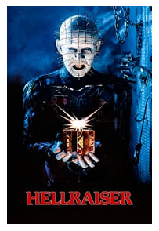

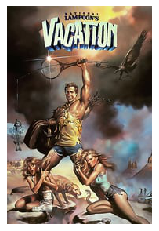

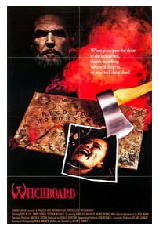

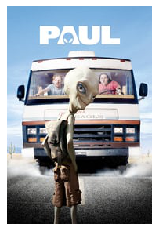

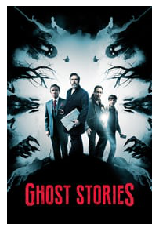

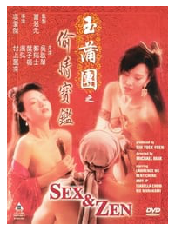

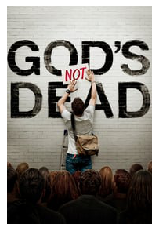

In [5]:
# Get image POC:

from imageio import imread
import matplotlib.pyplot as plt

base_url = r"http://image.tmdb.org/t/p/w185"
cnt = 1
for poster in train_raw.poster_path:
    image = imread(base_url+poster)
    plt.figure()
    plt.axis('off')
    plt.imshow(image)
    if cnt == 10:
        break
    cnt += 1



In [271]:
train = train_raw[['belongs_to_collection', 'budget', 'genres',
                    'imdb_id', 'original_language', 'original_title',
                    'overview', 'popularity', 'production_companies',
                    'production_countries', 'release_date', 'runtime',
                    'spoken_languages', 'status', 'tagline', 'title',
                    'vote_average', 'vote_count', 'Keywords', 'cast', 'crew']]

poster_df = train_raw[['poster_path']]
Y = train_raw[['revenue']]

train['belongs_to_collection'] = train_raw['belongs_to_collection'].apply(lambda x: None if pd.isna(x) else eval(x))
COLLECTION_DICT = {v['id']:v['name'] for v in train['belongs_to_collection'] if not pd.isna(v)}
train['belongs_to_collection'] = train.belongs_to_collection.apply(lambda x: None if pd.isna(x) else x['id'])


train['genres'] = train.genres.apply(eval)
GENRES_DICT = {v['id']:v['name'] for v in train.genres.sum()}
train['genres'] = train.genres.apply(lambda gs: tuple(g['id'] for g in gs))


train['production_companies'] = train.production_companies\
                                        .apply(lambda companies: tuple(company['id'] for company in eval(companies)))


train['production_countries'] = train.production_countries.apply(lambda countries: tuple(country['iso_3166_1'] for country in eval(countries)))

train['release_date'] = train.release_date.apply(datetime.fromisoformat)


train['spoken_languages'] = train.spoken_languages.apply(lambda langs: tuple(lang['iso_639_1'] for lang in eval(langs)))


train['Keywords'] = train.Keywords.apply(eval)
KEYWORDS_DICT = {v['id']:v['name'] for v in train.Keywords.sum()}
train['Keywords'] =train.Keywords.apply(lambda keywords: tuple(kw['id'] for kw in keywords))

train['cast'] = train.cast.apply(eval) # TODO: What should we do with cast details??

train['crew'] = train.crew.apply(eval) # TODO: What should we do with crew details??

In [272]:
train

,belongs_to_collection,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,Keywords,cast,crew
0,556.0,258000000,"(14, 28, 12)",tt0413300,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,22.024,"(19551, 5, 326, 34)","(US,)",...,139.0,"(en, fr)",Released,The battle within.,Spider-Man 3,6.2,8180,"(697, 851, 1453, 1965, 2038, 3446, 3986, 4391,...","[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de..."
1,256296.0,250000,"(35, 27)",tt0093974,en,"Silent Night, Deadly Night Part 2",After being traumatized by his brother Billy's...,4.756,"(18924,)","(US,)",...,88.0,"(en,)",Released,The nightmare is about to begin ... AGAIN!,"Silent Night, Deadly Night Part 2",4.3,68,"(65, 1991, 9663, 9826, 10714, 11181, 157758, 1...","[{'cast_id': 1000, 'character': 'Ricky Caldwel...","[{'credit_id': '52fe47d4c3a36847f814a70f', 'de..."
2,NaN,0,"(99,)",tt2773246,en,Scotty and the Secret History of Hollywood,A deliciously scandalous portrait of unsung Ho...,4.746,"(88564,)","(US,)",...,98.0,"(en,)",Released,NaN,Scotty and the Secret History of Hollywood,6.5,15,"(158718,)","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '5980e931c3a3680cfb002d0e', 'de..."
3,8917.0,1000000,"(27,)",tt0093177,en,Hellraiser,An unfaithful wife encounters the zombie of he...,13.828,"(1950, 15338, 15339, 15340)","(GB,)",...,94.0,"(en,)",Released,He'll tear your soul apart.,Hellraiser,6.9,1115,"(1449, 3182, 6152, 9748, 10327, 10864, 15001, ...","[{'cast_id': 15, 'character': 'Larry Cotton', ...","[{'credit_id': '533fd9260e0a262b92001027', 'de..."
4,108693.0,15000000,"(35, 12)",tt0085995,en,National Lampoon's Vacation,Clark Griswold is on a quest to take his famil...,15.070,"(174,)","(US,)",...,99.0,"(en,)",Released,Every summer Chevy Chase takes his family on a...,National Lampoon's Vacation,7.1,782,"(5493, 7312, 10673, 14724, 33694, 158340, 179431)","[{'cast_id': 1, 'character': 'Clark Griswold',...","[{'credit_id': '52fe44039251416c75025f27', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5210,239968.0,0,"(35,)",tt0088873,fr,"La cage aux folles III - ""Elles"" se marient",Third and final version of the La Cage aux Fol...,3.050,"(23531, 16058)","(FR, IT)",...,87.0,"(fr,)",Released,NaN,La Cage aux Folles 3: The Wedding,4.7,29,"(237, 824, 15130)","[{'cast_id': 2, 'character': 'Renato Baldi', '...","[{'credit_id': '52fe4990c3a368484e131c15', 'de..."
5211,111751.0,85000,"(27,)",tt0072271,en,The Texas Chain Saw Massacre,When Sally hears that her grandfather's grave ...,11.580,"(12, 1197)","(US,)",...,83.0,"(en,)",Released,Who will survive and what will be left of them?,The Texas Chain Saw Massacre,7.3,1483,"(1420, 1556, 4580, 11487, 11545, 11546, 11547,...","[{'cast_id': 10, 'character': 'Sally Hardesty'...","[{'credit_id': '5402d0d70e0a2658f10069fd', 'de..."
5212,NaN,30000000,"(12, 35, 37)",tt0119053,en,Almost Heroes,Two hapless explorers lead an ill-fated 1804 e...,7.946,"(813, 6189)","(US,)",...,90.0,"(en,)",Released,Almost History... Almost Legends... Mostly Rid...,Almost Heroes,5.6,91,"(1721, 3930, 9253, 10322, 10468, 165577, 17348...","[{'cast_id': 1, 'character': 'Bartholomew Hunt...","[{'credit_id': '5779d18e92514103fc0000bc', 'de..."
5213,NaN,20000000,"(878, 18, 10749)",tt0338013,en,Eternal Sunshine of the Spotless Mind,"Joel Barish, heartbroken that his girlfriend u...",19.693,"(10146, 10039, 10059)","(US,)",...,108.0,"(en,)",Released,You can erase someone from your mind. Getting ...,Eternal Sunshine of the Spotless Mind,8.1,8753,"(563, 802, 931, 1453, 1566, 1604, 5625, 9673, ...","[{'cast_id': 5, 'character': 'Joel Barish', 'c...","[{'credit_id': '52fe4211c3a36847f800166f', 'de..."
